# ❓ <font color='green'> <u> PROBLEM STATEMENT (Cloth Manufacturing Company) </u>

## 🔵 <font color='blue'>A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

### About the data: Let’s consider a Company dataset with around 10 variables and 400 records.

* ### <font color='candy'>➡ The attributes are as follows: 
    + #### Sales -- Unit sales (in thousands) at each location
    + #### Competitor Price -- Price charged by competitor at each location
    + #### Income -- Community income level (in thousands of dollars)
    + #### Advertising -- Local advertising budget for company at each location (in thousands of dollars)
    + #### Population -- Population size in region (in thousands)
    + #### Price -- Price company charges for car seats at each site
    + #### Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
    + #### Age -- Average age of the local population
    + #### Education -- Education level at each location
    + ####  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    + ####  US -- A factor with levels No and Yes to indicate whether the store is in the US or not

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> Decision Tree</u></font> is a <u> hierarchical model</u> that uses a tree-like structure to display decisions and their possible consequences. It is a type of <u>supervised machine learning</u> that can be used for <u>classification and regression</u> problems. A decision tree can help an individual or organization <u>compare possible actions</u> based on their costs, probabilities and benefits. It can also be used to <u>categorize or make predictions</u> based on how a previous set of questions were answered.
    
* ### Some popular types of decision tree algorithms:
    + ##### C5.0 ( For Classification - uses Entropy Criteria)
    + ##### CART (For Classification - uses Gini Impurity and For Regression Trees- uses RSS)
    + ##### Chi-Square
    + ##### Reduction in Variance

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets_Assignments/main/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [2]:
df.shape

(400, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.duplicated().sum()

0

* ##### <font color ='green'> <u>Creating Target Column:</u>

##### Target Variable "Sales" have Numeric datatype as the problem is for Classification we will convert it in Objective Datatype with the help of  Descriptive Statistics.

In [7]:
df['Sales'].mean()

7.496325000000001

In [8]:
df["Sales_Status"] = "Bad"
df.loc[df["Sales"] > 7.49,"Sales_Status"] = "Good"
df.drop(["Sales"], axis=1, inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad


> * #### There are 400 records and 11 Variables.
> * #### All variables are of proper data type.
> * #### "Sales" is target column. We will convert in "Sales_Status".
> * #### No null value observed.
> * #### There is no duplicated record.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

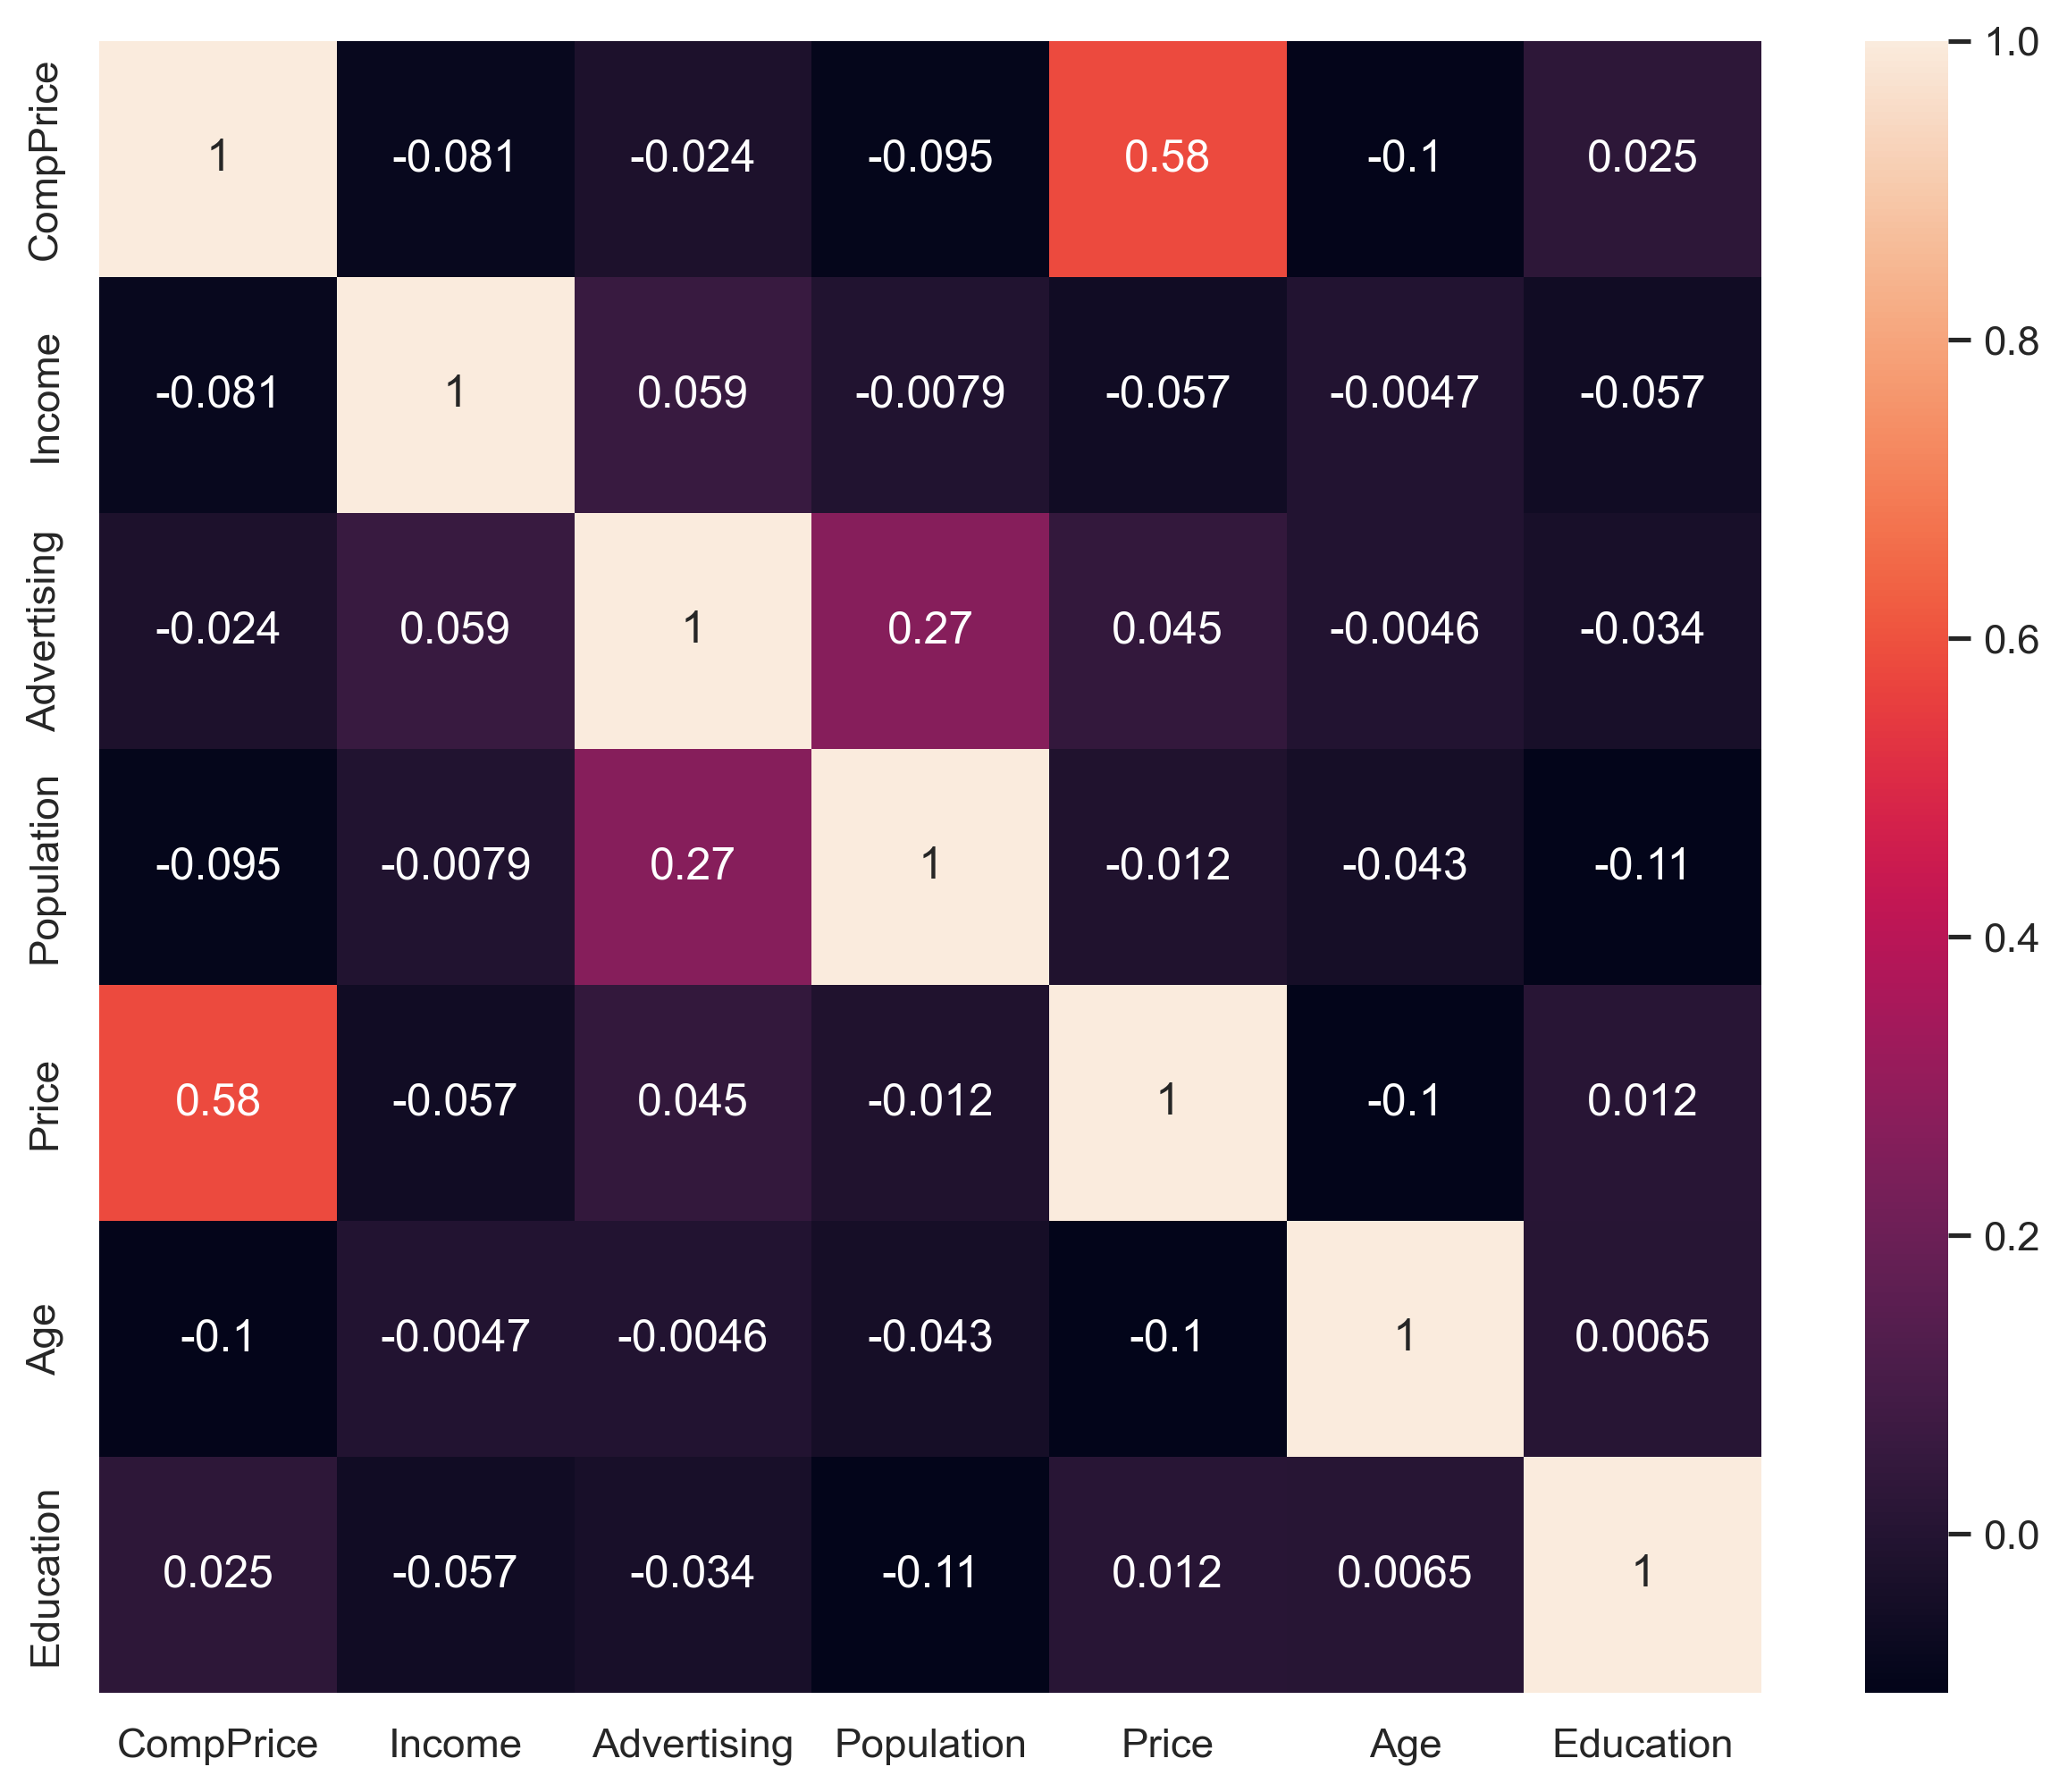

In [9]:
# Correation between Numerical variables:
sns.heatmap(df.corr(), annot = True)

<Axes: >

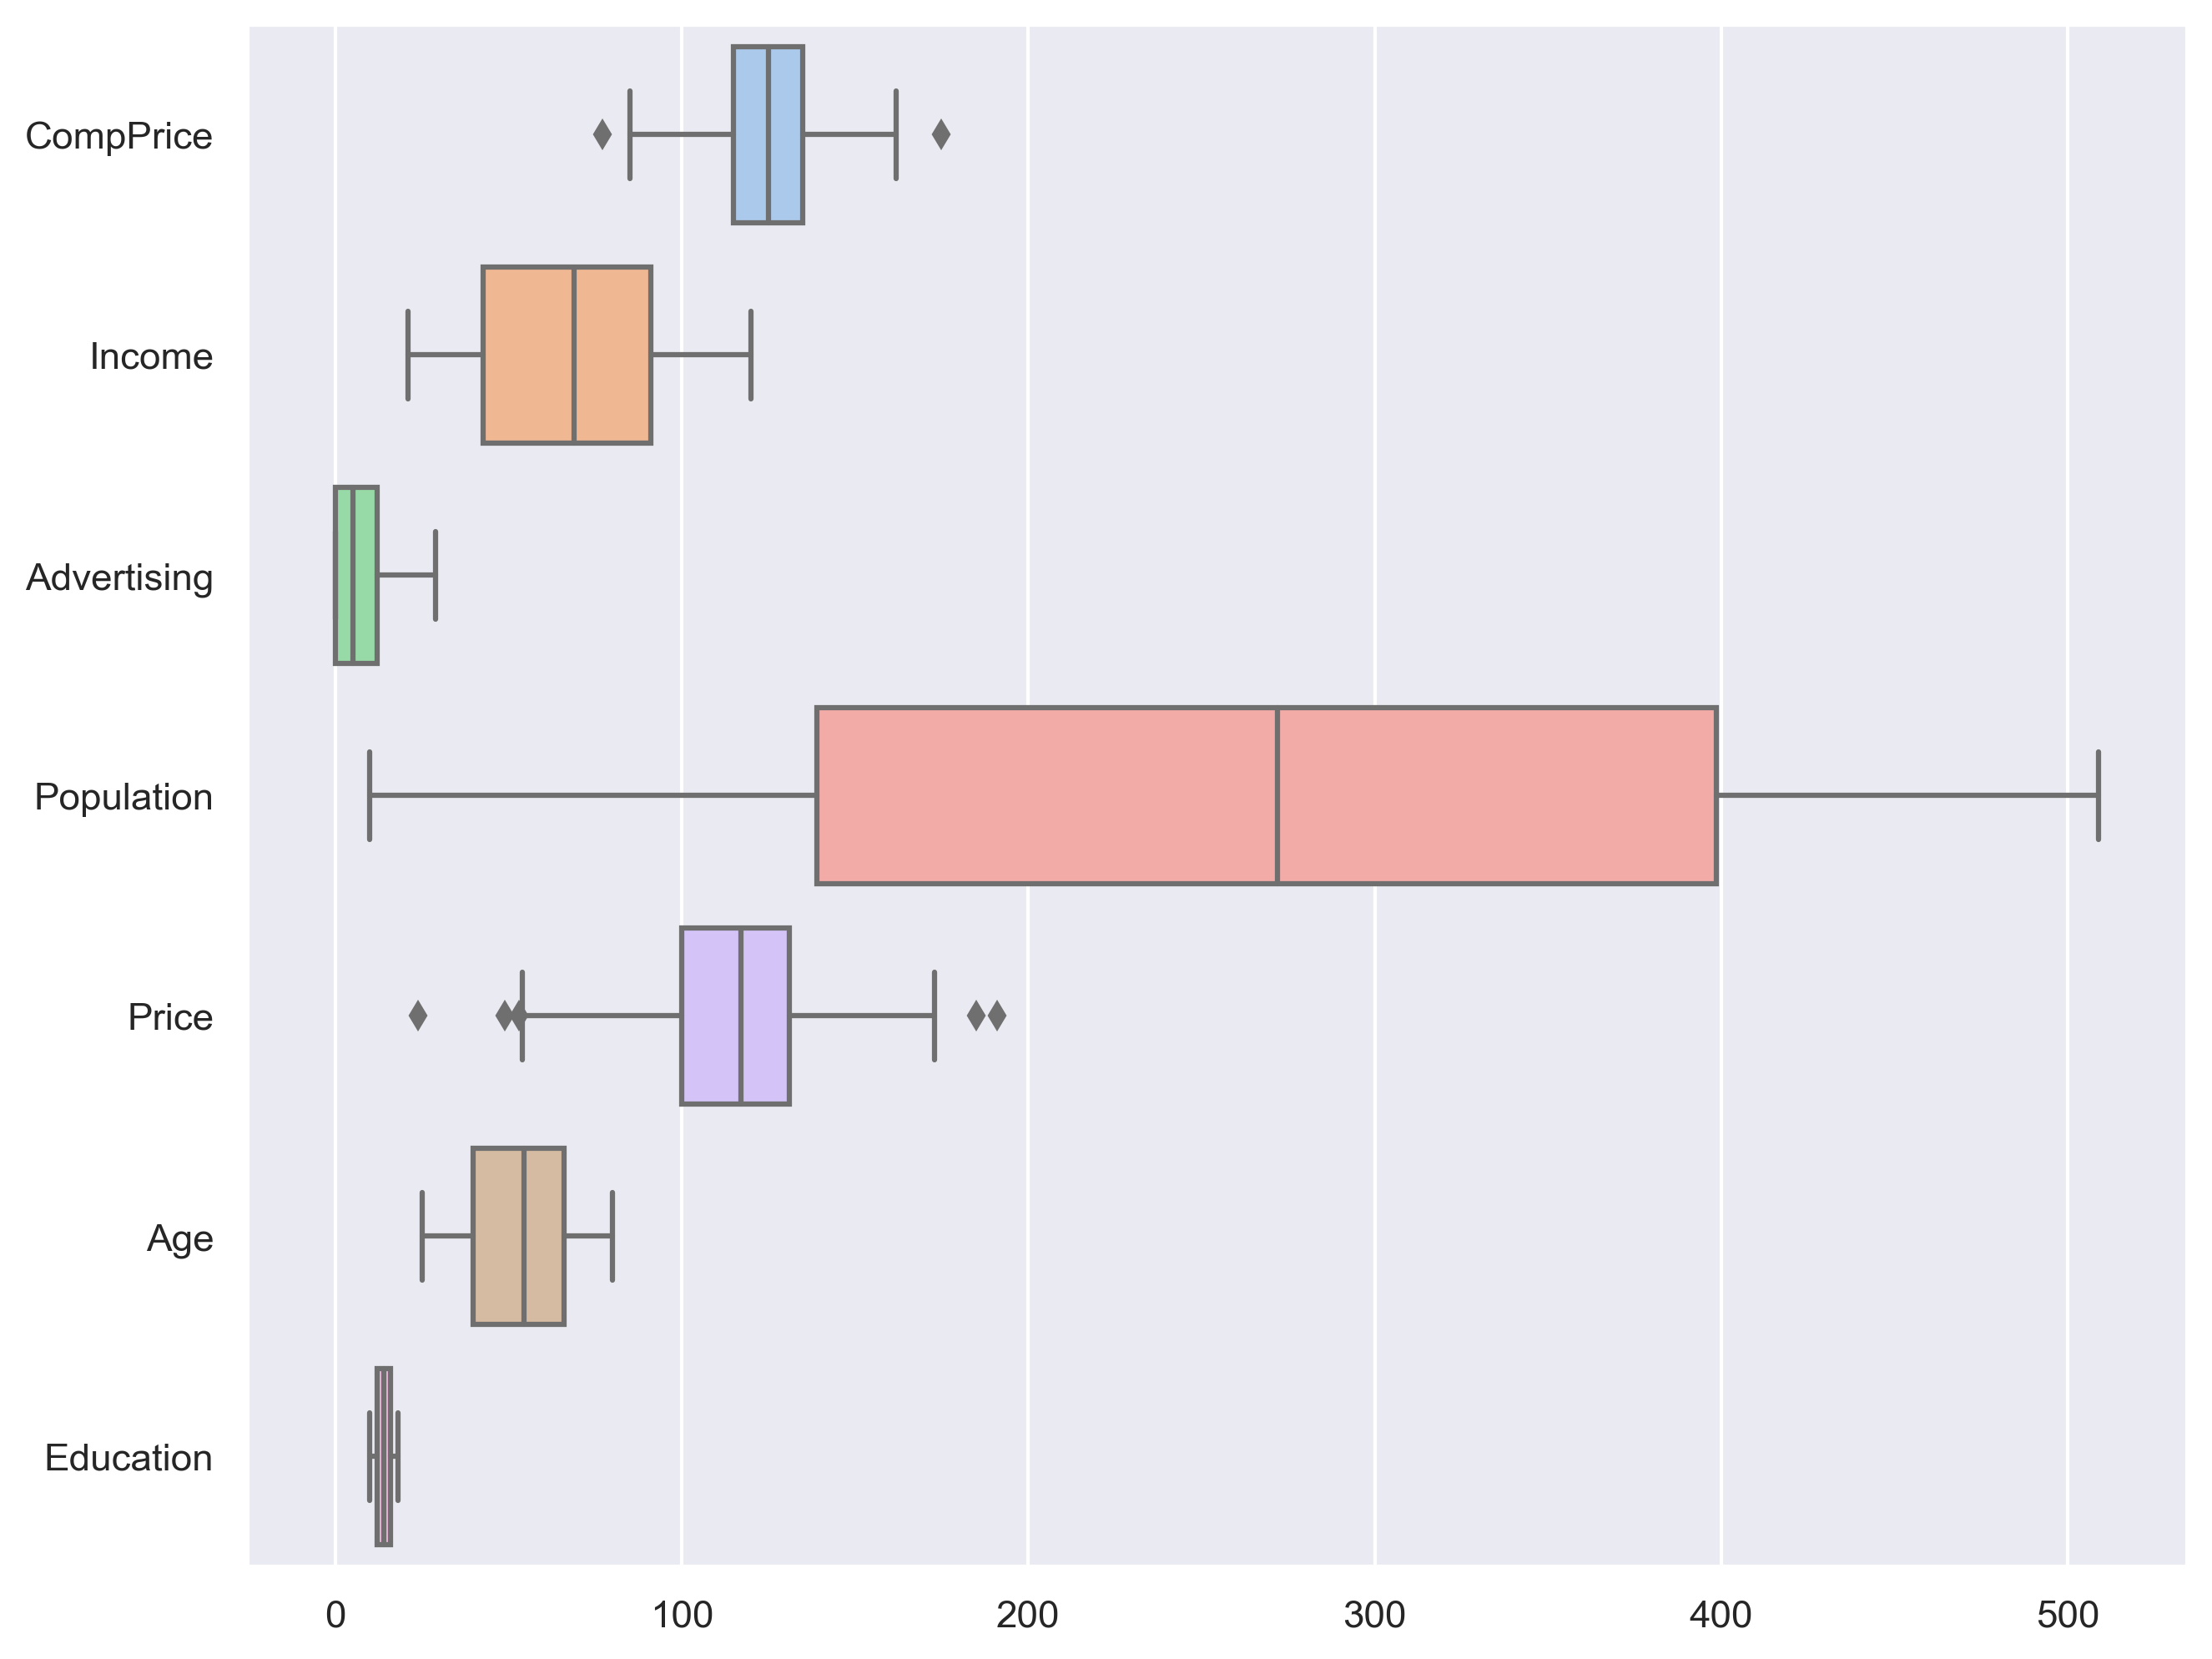

In [10]:
sns.boxplot(data = df, orient="h")

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

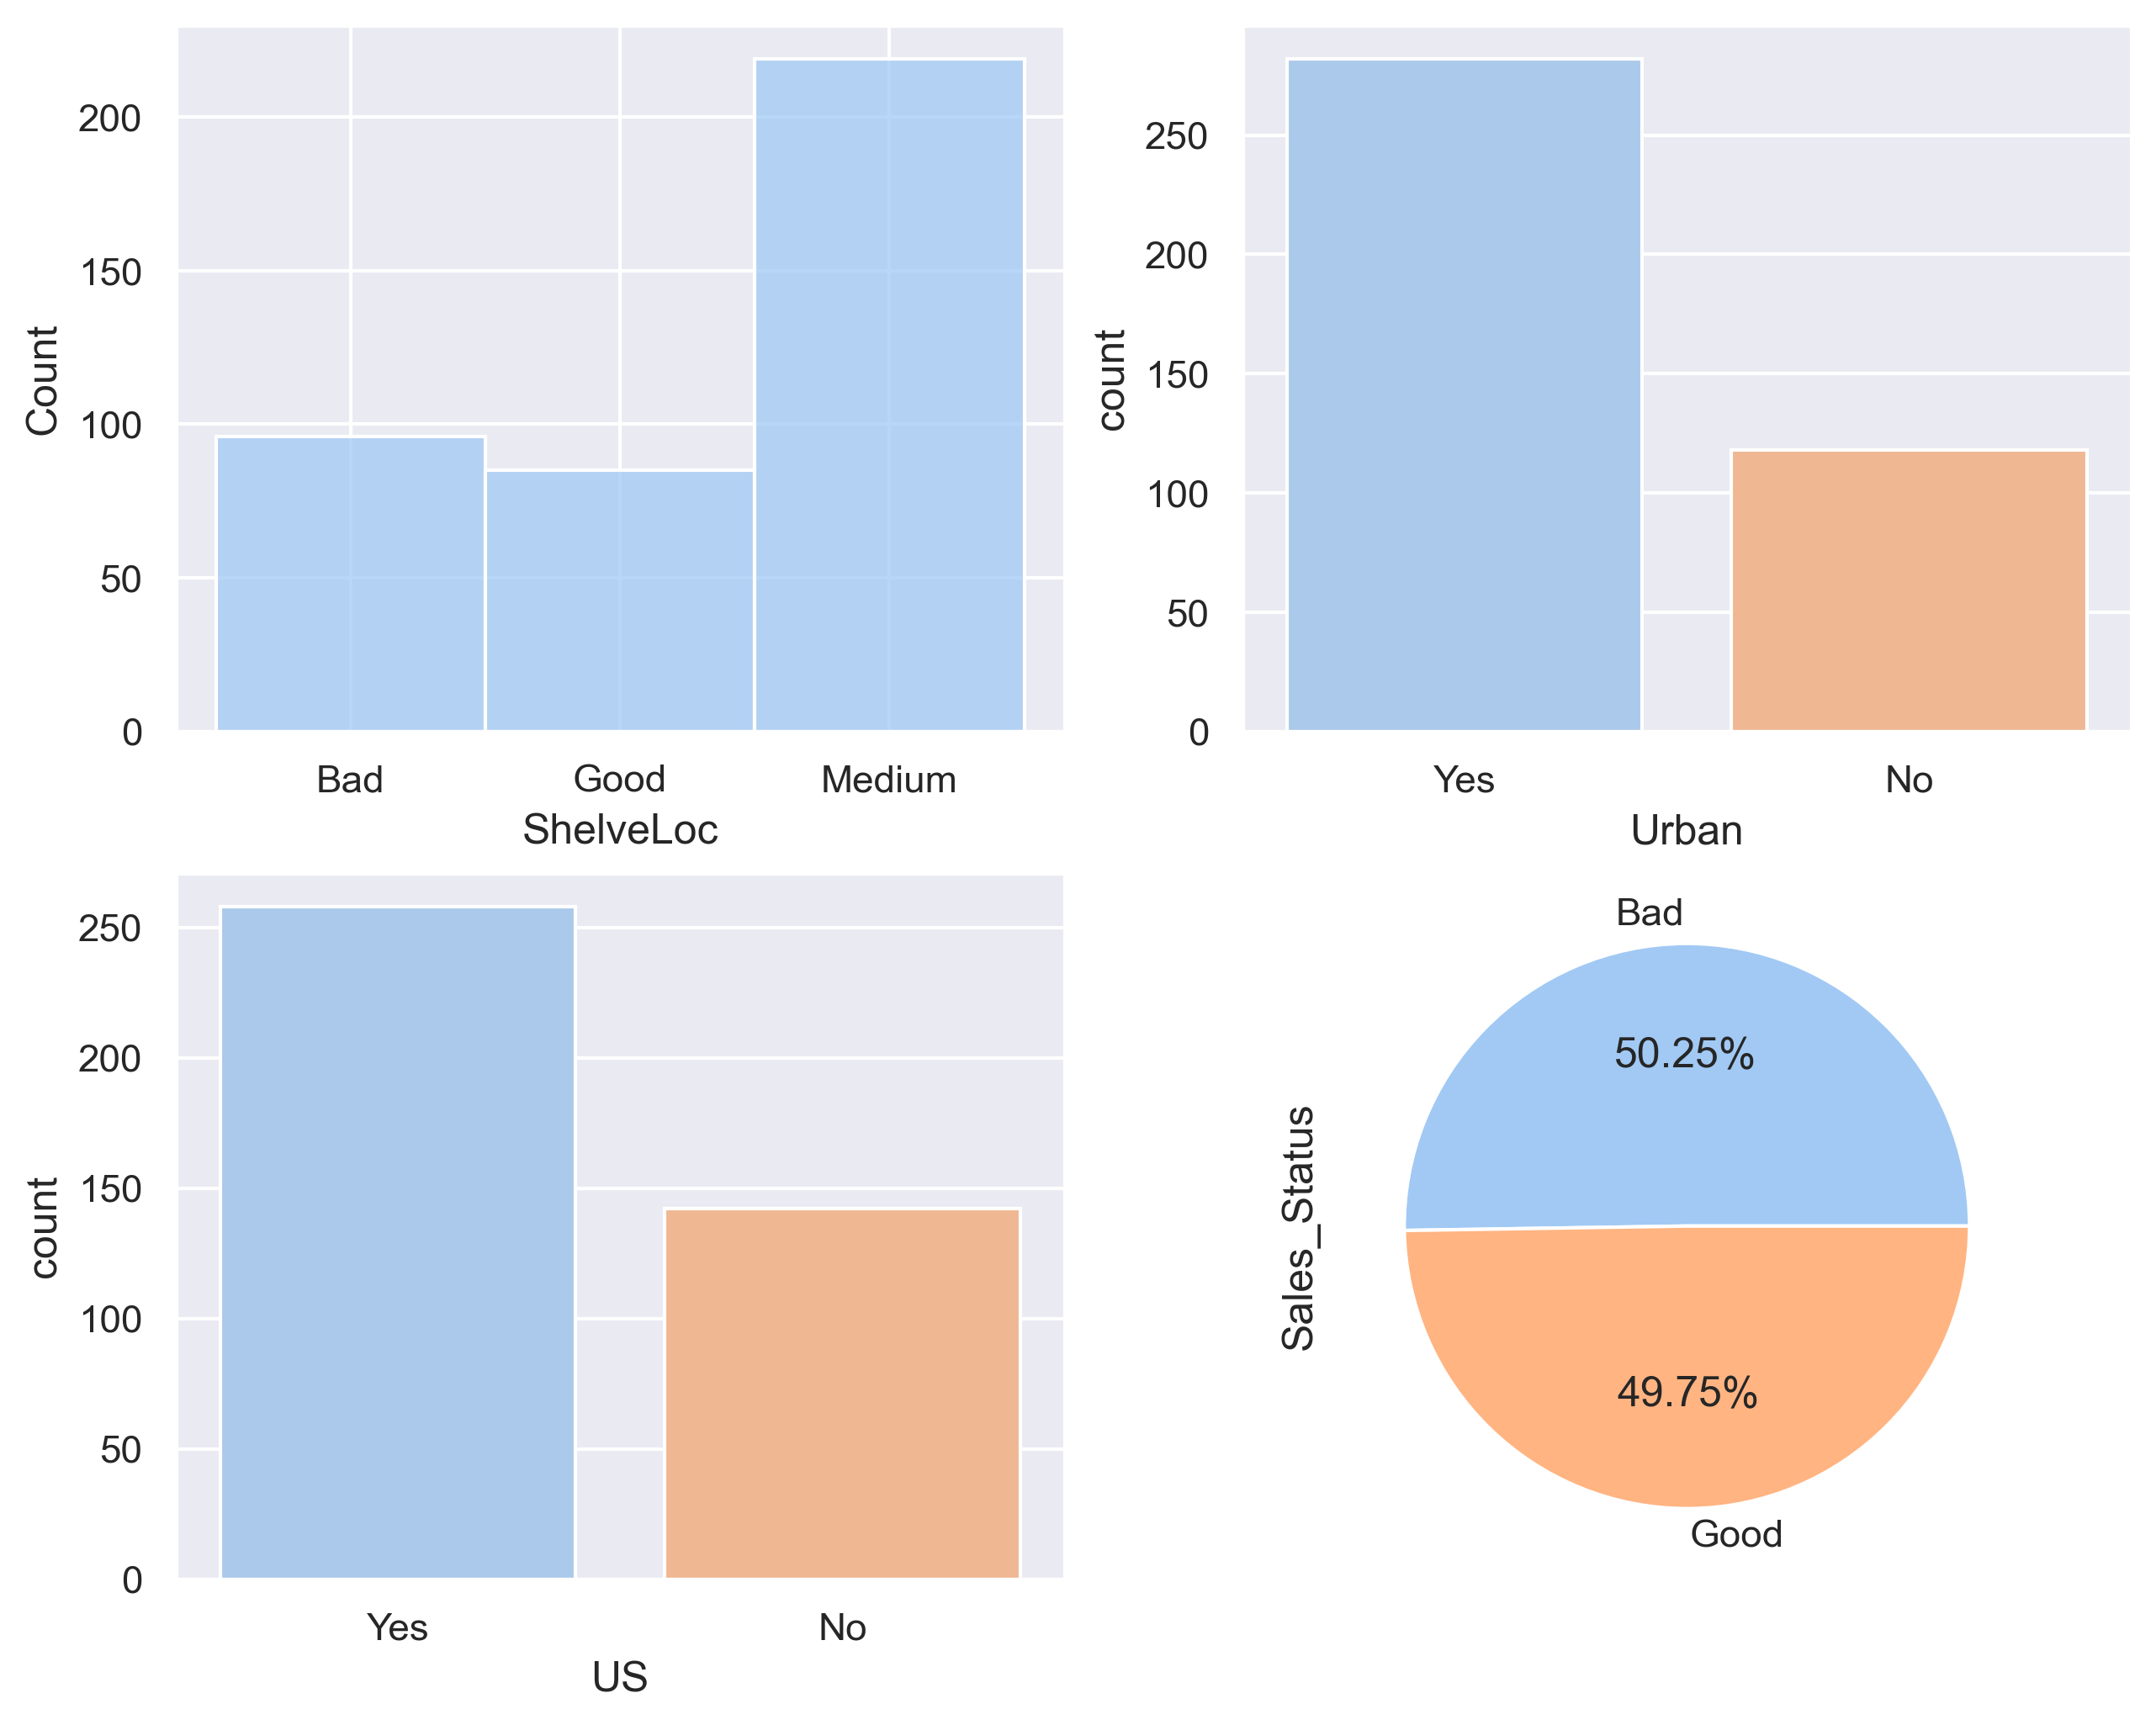

In [11]:
# Plottig Categorical Variables:
fig,index = plt.subplots(2,2)

sns.histplot(df['ShelveLoc'],ax = index[0,0] )
sns.countplot(x = df['Urban'], ax = index[0,1])
sns.countplot(x = df['US'], ax = index[1,0])
df['Sales_Status'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', ax = index[1,1])
plt.tight_layout

> * #### Only "Price" (Price company charges for car seats at each site) and "Competitor Price" (Price charged by competitor at each location) variables are moderately correlated. None of other variables are correlated.
> * #### In Boxplt we observe outliers in "Competitor Price" and "Price". 
> * #### For "ShelveLoc - Shelf Location at stores" majority belongs to "Medium" category.
> * #### Majority stores are in "US" and in "Urban" area.
> * #### For target variable, "Sales_Status" devided in equal parts in "Good" and "Bad" category.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Ordinal Encoding 
* Attributes which are of object datatype we encode them into numerical data type using Ordinal Encoding.

In [12]:
# Getting Independent Categorical Variables:
cat_cols = df[['ShelveLoc', 'Urban', 'US']].columns
cat_cols

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [13]:
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Status
0,138,73,11,276,120,0.0,42,17,1.0,1.0,Good
1,111,48,16,260,83,1.0,65,10,1.0,1.0,Good
2,113,35,10,269,80,2.0,59,12,1.0,1.0,Good
3,117,100,4,466,97,2.0,55,14,1.0,1.0,Bad
4,141,64,3,340,128,0.0,38,13,1.0,0.0,Bad


In [14]:
df['Sales_Status'].value_counts()

Bad     201
Good    199
Name: Sales_Status, dtype: int64

### <font color = "green">➡ Train Test Split 

In [15]:
x = df.iloc[:,:10]
y = df['Sales_Status']

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [17]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (300, 10)
Shape of x_test:  (100, 10)
Shape of y_train:  (300,)
Shape of y_test (100,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [18]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

In [19]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         Bad       0.67      0.62      0.65        48
        Good       0.67      0.71      0.69        52

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



In [20]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 67.00%


In [21]:
print(f'Tranning Score: {dt.score(xtrain,ytrain)}')
print(f'Testing Score:{dt.score(xtest,ytest)}')

Tranning Score: 1.0
Testing Score:0.67


In [22]:
print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')

Confusion Matrix: 
 [[30 18]
 [15 37]]


> * #### There is hugh difference in Training And Testing Accuracy and Training Accuracy is 100% means there is Overfitting issue. So, we perform Hyperparameter Tunning.

___

* ### <font color = 'blue'> <u> HYPERPARAMETER TUNNING</u>

In [23]:
# Defining Dictionary of Parameters:
params = {'criterion' : ['gini', 'entropy', 'log_loss'], 
          'splitter' : ['best', 'random'], 
          'max_depth' : [6,7,8,9,10,12,14],
          'min_samples_split' : [3,4,5,6,8,10,12],
          'max_leaf_nodes' : [2,4,6],
          'min_samples_leaf' : [1,2,3,4,5]
         }

In [24]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, verbose= -1,cv= 5)

In [25]:
# Getting Best Parameters:
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 7, 8, 9, 10, 12, 14],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 8, 10, 12],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [26]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [27]:
# New Model with parameters we achieved:
dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_depth = 6, 
                            max_leaf_nodes = 6, min_samples_leaf = 4, min_samples_split = 6)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         Bad       0.68      0.98      0.80        48
        Good       0.97      0.58      0.72        52

    accuracy                           0.77       100
   macro avg       0.82      0.78      0.76       100
weighted avg       0.83      0.77      0.76       100



In [28]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 77.00%


In [29]:
print(f'Tranning Score: {dt.score(xtrain,ytrain)}')
print(f'Testing Score:{dt.score(xtest,ytest)}')

Tranning Score: 0.73
Testing Score:0.77


In [30]:
print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')

Confusion Matrix: 
 [[47  1]
 [22 30]]


Text(277.75, 0.5, 'Actual Values')

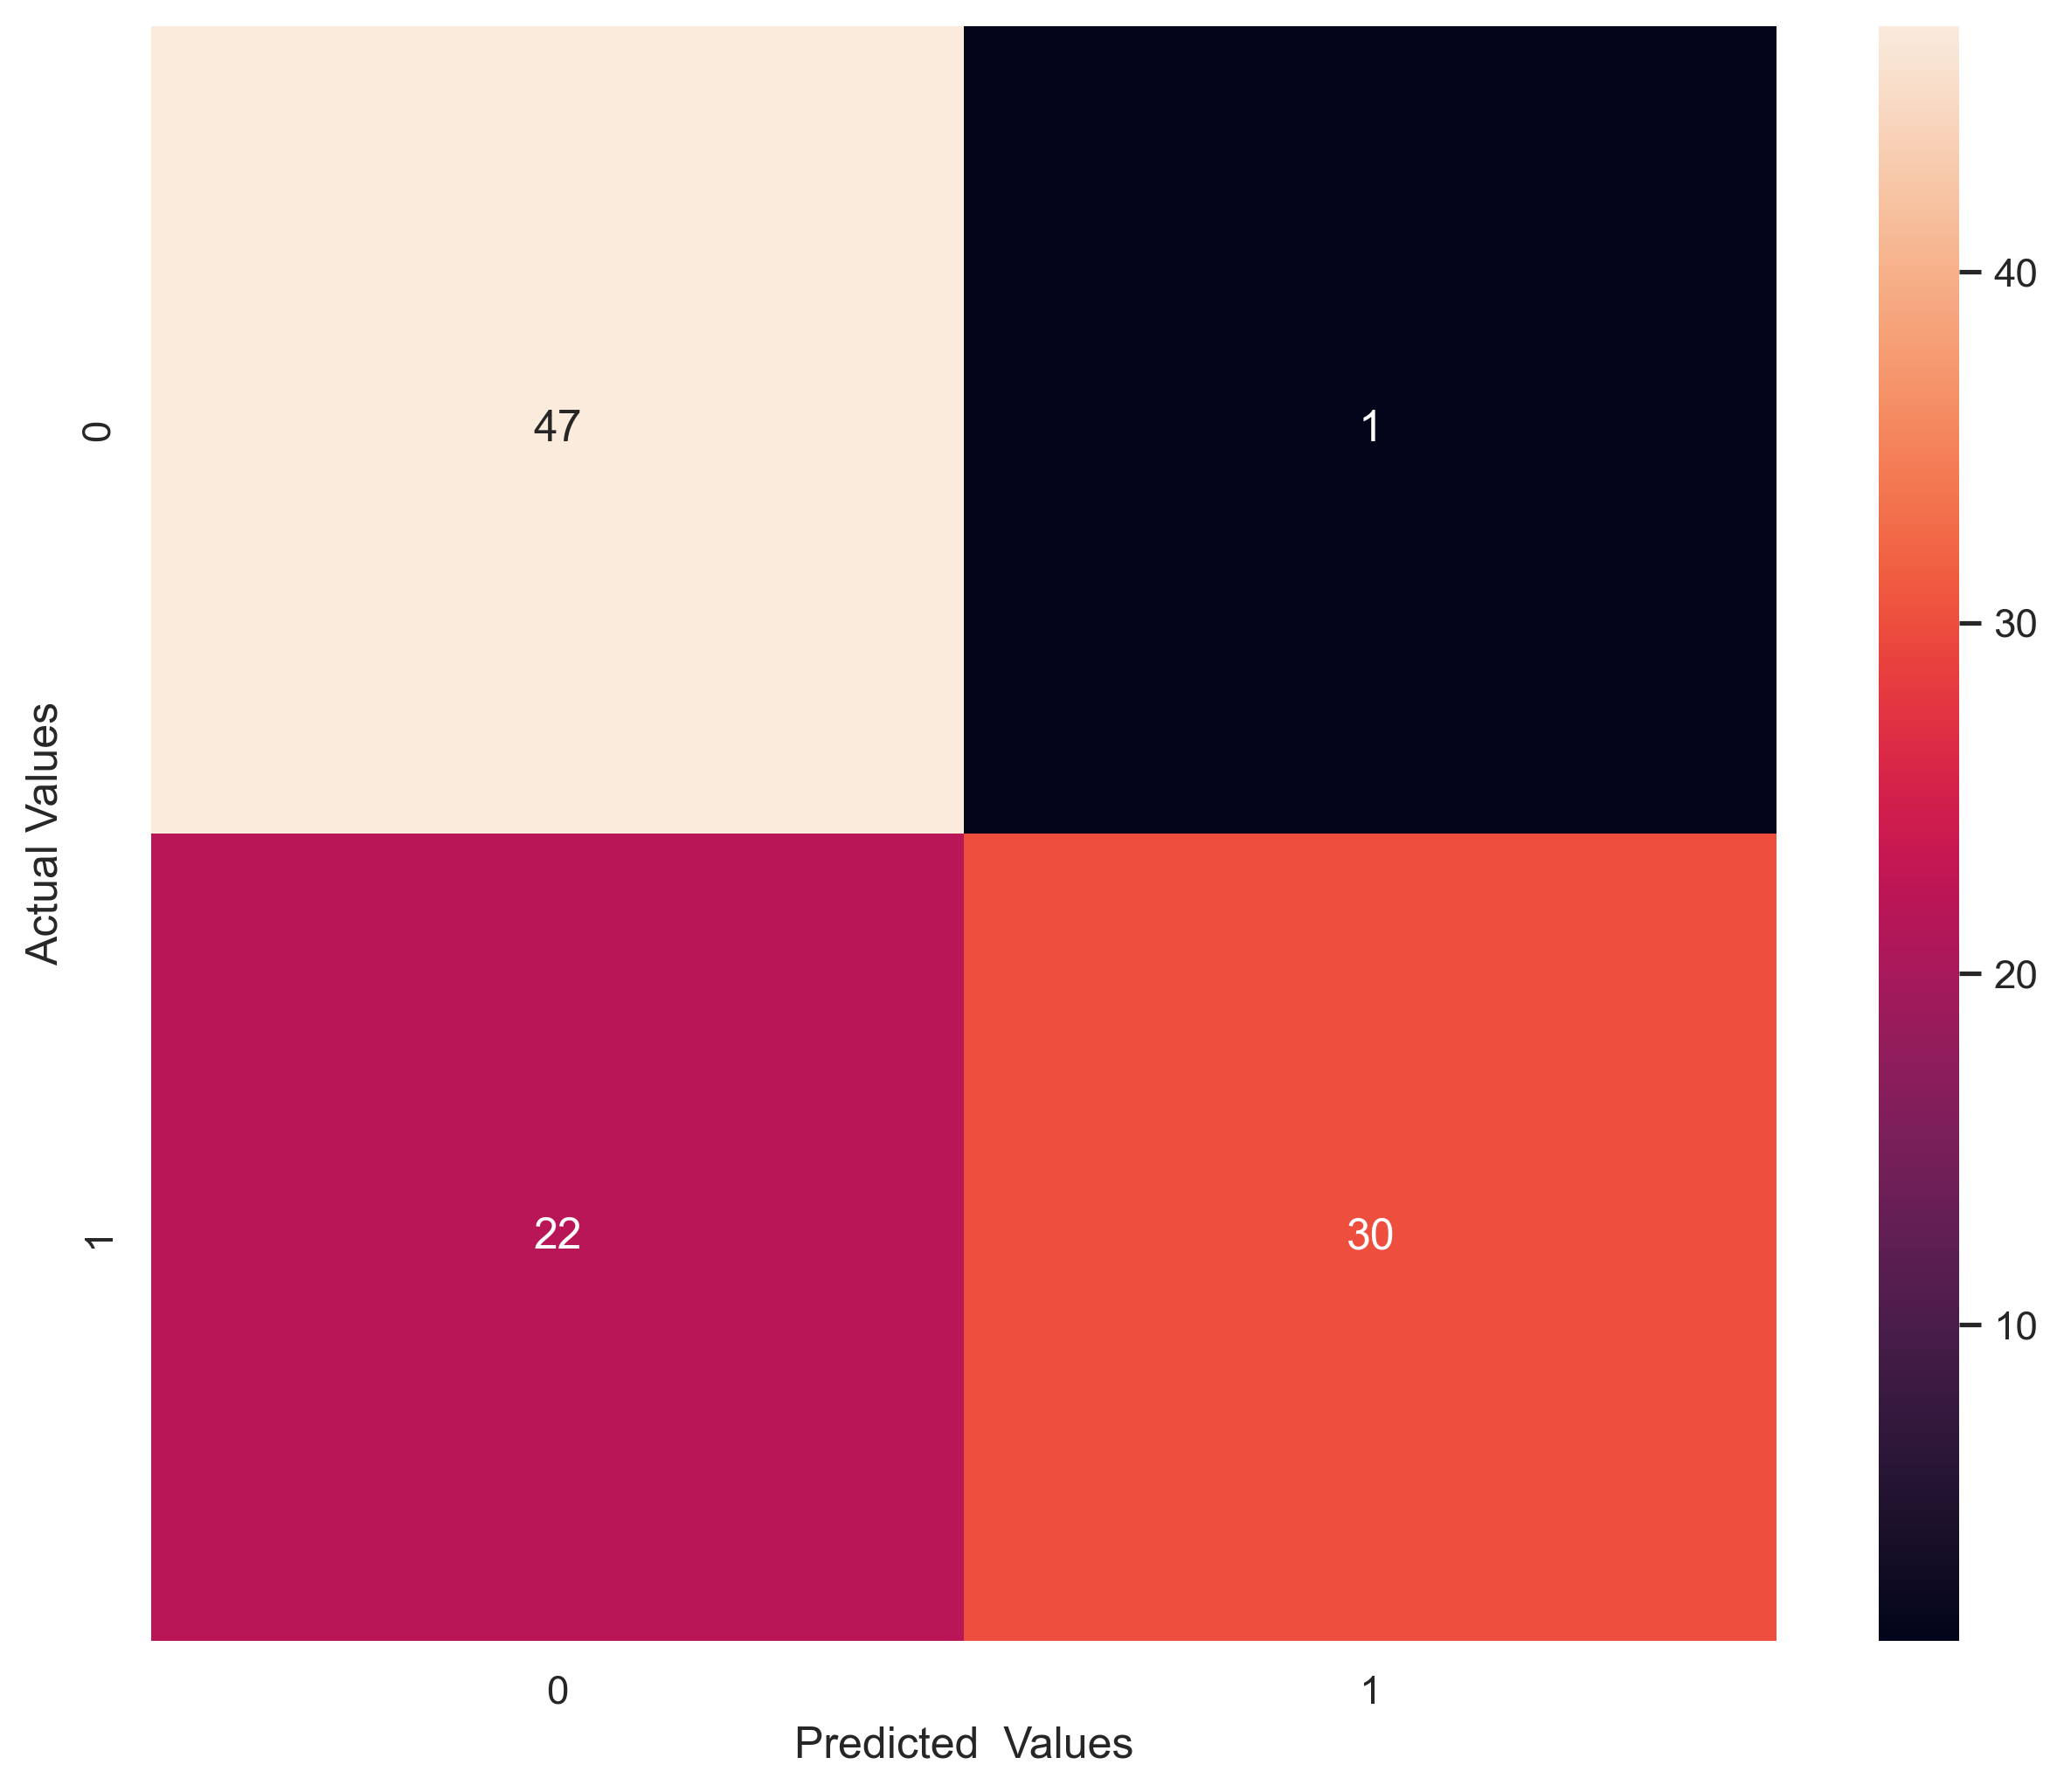

In [31]:
# Visualise the confusion matrix:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Predicted  Values')
plt.ylabel('Actual Values')

### <font color = "green">➡ Information Gain 

In [32]:
# Important Variables:
dt.feature_importances_

array([0.13151864, 0.        , 0.        , 0.        , 0.43556506,
       0.4329163 , 0.        , 0.        , 0.        , 0.        ])

In [33]:
pd.DataFrame({
    'feature':x.columns,
    'IG':dt.feature_importances_
}).sort_values('IG',ascending=False)

,feature,IG
4,Price,0.435565
5,ShelveLoc,0.432916
0,CompPrice,0.131519
1,Income,0.000000
2,Advertising,0.000000
3,Population,0.000000
6,Age,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


### <font color = "green">➡ Visualising Tree:

[Text(0.3333333333333333, 0.9166666666666666, 'Price <= 85.372\ngini = 0.5\nsamples = 300\nvalue = [153, 147]\nclass = Good'),
 Text(0.16666666666666666, 0.75, 'gini = 0.153\nsamples = 24\nvalue = [2, 22]\nclass = Bad'),
 Text(0.5, 0.75, 'ShelveLoc <= 0.126\ngini = 0.496\nsamples = 276\nvalue = [151, 125]\nclass = Good'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.32\nsamples = 65\nvalue = [52, 13]\nclass = Good'),
 Text(0.6666666666666666, 0.5833333333333334, 'Price <= 137.345\ngini = 0.498\nsamples = 211\nvalue = [99, 112]\nclass = Bad'),
 Text(0.5, 0.4166666666666667, 'ShelveLoc <= 1.391\ngini = 0.479\nsamples = 174\nvalue = [69, 105]\nclass = Bad'),
 Text(0.3333333333333333, 0.25, 'gini = 0.206\nsamples = 43\nvalue = [5, 38]\nclass = Bad'),
 Text(0.6666666666666666, 0.25, 'CompPrice <= 139.332\ngini = 0.5\nsamples = 131\nvalue = [64, 67]\nclass = Bad'),
 Text(0.5, 0.08333333333333333, 'gini = 0.496\nsamples = 116\nvalue = [63, 53]\nclass = Good'),
 Text(0.8333333333333

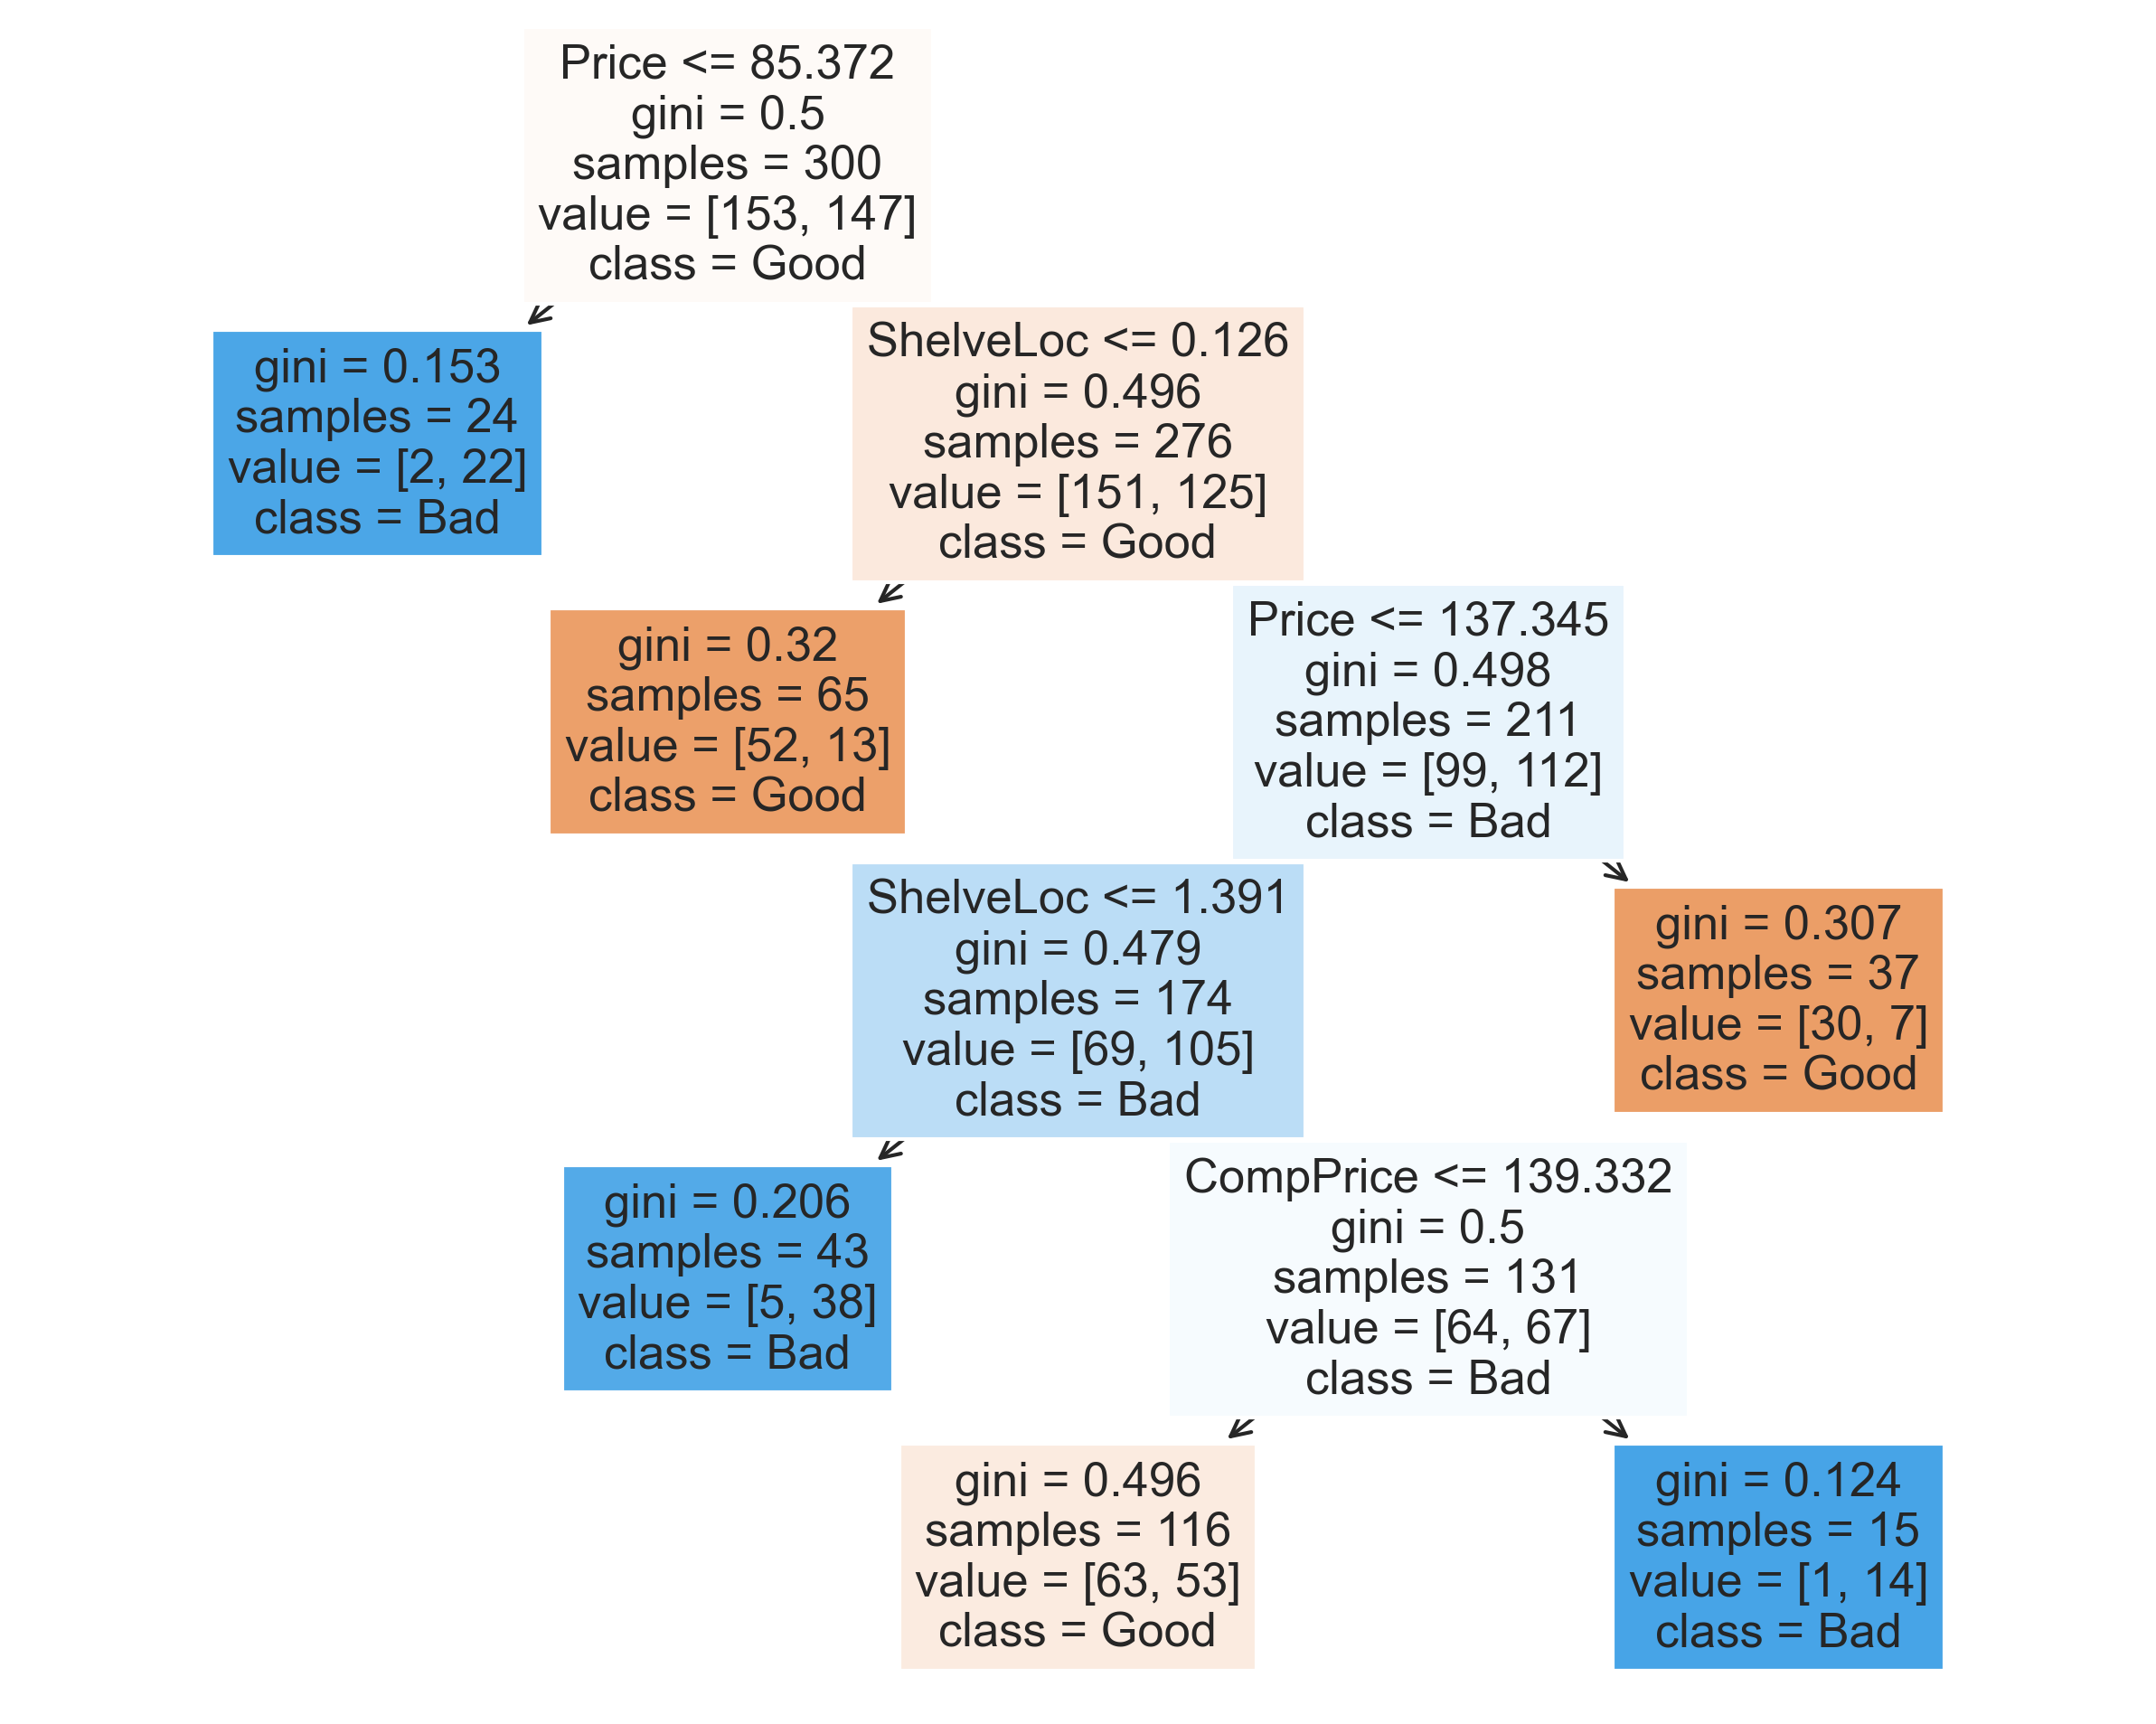

In [35]:
tree.plot_tree(dt, feature_names=x.columns, class_names=df['Sales_Status'].unique(), filled=True)

> * #### Training Accuracy is 73% and Testing Accuracy is 77%.
> * #### All variables except 'Price', 'ShelveLoc', 'CompPrice' all other have zero Information Gain Value means only these three variables are used in this decision tree classifier.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___